# Mục mới

In [1]:
#import thư viện cần thiết
## thư viện machine learning và hỗ trợ
import tensorflow as tf
from tensorflow.keras import backend as K
import numpy as np

## thư viện để vẽ đồ thị
import matplotlib.pyplot as plt

In [2]:
#hàm build có tác dụng sẽ tự động khởi tạo các weights 
#hàm call sẽ tự động tính toán cho layer
class Linear(tf.keras.layers.Layer):
    def __init__(self, units=100):
        super().__init__() 
        self.units = units #Định nghĩa số hidden nodes cho lớp Fully Connected 
    def build(self, input_shape):
        #Định nghĩa ma trận weight W
        ##shape là kích thước của ma trận
        ##initializer là initial weight của ma trận
        ##trainble cho phép ma trận có được cập nhật sau mỗi lần training hay không
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer=tf.random_normal_initializer,
                                 trainable=True,
                                 name="w1") 
        
        #Định nghĩa bias để cộng thêm vào lớp FC
        self.b = self.add_weight(shape=(self.units,),
                                 initializer=tf.random_normal_initializer,
                                 trainable=True,
                                 name="b1")
    def call(self, inputs):
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)

# Chạy thử

In [3]:
x = tf.ones((1, 2))
linear_layer = Linear(100) ##hàm __init__ được gọi
y = linear_layer(x)  ##hàm build và call được gọi
print(y)

tf.Tensor(
[[0.00876971 0.17531225 0.         0.0653084  0.06035549 0.
  0.0108839  0.1329472  0.05061825 0.         0.         0.
  0.         0.         0.         0.14735264 0.         0.11692476
  0.13876453 0.         0.07076163 0.00530534 0.         0.
  0.         0.         0.         0.         0.23670943 0.08927962
  0.00673085 0.01213291 0.         0.         0.         0.14755213
  0.         0.         0.06293819 0.02264187 0.         0.04388374
  0.         0.13481548 0.03243938 0.         0.         0.17971668
  0.161026   0.02619427 0.04410207 0.01651651 0.06054538 0.10708683
  0.         0.         0.         0.08804815 0.         0.04183556
  0.         0.2095965  0.         0.04246886 0.08965801 0.04024654
  0.         0.         0.05795629 0.         0.11358417 0.11345726
  0.         0.         0.         0.01638699 0.00455244 0.10178006
  0.05661593 0.04178123 0.         0.         0.13747375 0.0411236
  0.00832269 0.13092926 0.05098013 0.         0.         0.126

In [4]:
#in thử các weights có trong block
for i in linear_layer.trainable_variables:
    print(i.name)

linear/w1:0
linear/b1:0


In [5]:
#shape của kernel trong conv được định nghĩa theo dạng:
# (width, height, dimension, number_of_filters)
class ConvMaxpoolBlock(tf.keras.layers.Layer):
    def __init__(self, filter_size, n_filters):
        super().__init__()
        self.filter_size = filter_size #định nghĩa window size 
        self.n_filters = n_filters #định nghĩa số filters
    def build(self, input_shape):
        self.kernel = self.add_weight(name="kernel",
                                      shape=(self.filter_size[0], self.filter_size[1], input_shape[-1], self.n_filters),
                                      initializer=tf.random_normal_initializer,
                                      trainable=True)
        self.bias = self.add_weight(name="bias",
                                      shape=(1,self.n_filters),
                                      initializer=tf.random_normal_initializer,
                                      trainable=True)
    def call(self, inputs):
        conv = K.conv2d(x=inputs,
                        kernel=self.kernel,
                        padding="same")
        conv = conv+self.bias
        conv = tf.nn.relu(conv)
        maxpool = K.pool2d(conv, 
                           pool_size=(2,2), 
                           strides=(2,2),
                          pool_mode='max')
        return maxpool

In [6]:
## Thử xem những tham số và kích thước của layer với input là ảnh (300,300,3)
inputs = tf.keras.layers.Input(shape=(300,300,3))
conv = ConvMaxpoolBlock(filter_size=[5,5], n_filters=10)  
conv_output = conv(inputs)                                ##hàm build và call được gọi

## In các biến train được của layer
print(conv.trainable_variables)
## In output của layer
print(conv_output.shape)

[<tf.Variable 'conv_maxpool_block/kernel:0' shape=(5, 5, 3, 10) dtype=float32, numpy=
array([[[[ 0.066999  , -0.00895001,  0.03179708,  0.03148161,
           0.00089178,  0.01515057, -0.00405301,  0.06719109,
           0.06945003, -0.041658  ],
         [ 0.06311191,  0.01801614, -0.04671941,  0.04918581,
           0.02511743,  0.0802122 ,  0.02194167, -0.06745274,
          -0.00529986, -0.03242049],
         [-0.00843829, -0.00301403, -0.00739768, -0.00282501,
          -0.09203108, -0.00127403, -0.03791817, -0.09891469,
           0.0032051 ,  0.07866261]],

        [[-0.02414005,  0.109151  ,  0.02469228,  0.03143516,
          -0.0452156 ,  0.05479017, -0.00356416, -0.10936892,
           0.00361284, -0.05117069],
         [-0.00087382, -0.00256894, -0.01411438,  0.04643748,
          -0.00578588, -0.03706903,  0.0014245 ,  0.02378793,
          -0.04308088,  0.03220253],
         [ 0.05216361,  0.09371574, -0.01780631,  0.02903373,
           0.030154  ,  0.06315806,  0.019707

In [7]:
model=tf.keras.models.Model(inputs=inputs, outputs=conv_output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv_maxpool_block (ConvMaxp (None, 150, 150, 10)      760       
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________


# Bài tập

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test
Mỗi ảnh có một kênh màu, kích thước 28x28

Ảnh đầu tiên của tập train
Label đầu tiên của tập train:  5


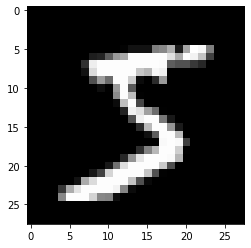

In [8]:
# Tải dataset MNIST từ tensorflow
## MNIST là bài toán dự đoán một ảnh thể hiện ký tự số nào trong các số từ 1 đến 10

## tải MNIST dataset từ keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
##resacle ảnh thành ảnh thực trong đoạn [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

##in dataset
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print("Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test")
print("Mỗi ảnh có một kênh màu, kích thước 28x28")
print()

## in thử ảnh một ảnh
print("Ảnh đầu tiên của tập train")
print("Label đầu tiên của tập train: ", y_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()

#Tách một phần tập train thành tập valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

In [9]:
class DoubleConvMaxpool(tf.keras.layers.Layer):
    def __init__(self,filter_size,filter_size_1, n_filters_1, n_filters_2):
        super().__init__()
        self.filter_size = filter_size
        self.filter_size_1 = filter_size_1
        self.n_filters_1 = n_filters_1
        self.n_filters_2 = n_filters_2
        #self.n_filter_2 = tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation='relu')
        # self.n_filters_1 = tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, activation='relu')
        # self.n_filters_2 = tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation='relu')
    def build(self, input_shape):
        self.kernel = self.add_weight(name="kernel",
                                      shape=(self.filter_size[0], self.filter_size[1], input_shape[-1], self.n_filters_1),
                                      initializer=tf.random_normal_initializer,
                                      trainable=True)
        self.bias = self.add_weight(name="bias",
                                      shape=(1,self.n_filters_1),
                                      initializer=tf.random_normal_initializer,
                                      trainable=True) 
        self.kernel_1 = self.add_weight(name="kernel",
                                      shape=(self.filter_size_1[0], self.filter_size_1[1], input_shape[-1],self.n_filters_2),
                                      initializer=tf.random_normal_initializer,
                                      trainable=True)
        self.bias_1 = self.add_weight(name="bias",
                                      shape=(1,self.n_filters_2),
                                      initializer=tf.random_normal_initializer,
                                      trainable=True) 
        
    def call(self, inputs):
        conv = K.conv2d(x=inputs,
                        kernel=self.kernel,
                        padding="same")
        conv = conv+self.bias
        conv = tf.nn.relu(conv)
        maxpool = K.pool2d(conv, 
                           pool_size=(2,2), 
                           strides=(2,2),
                          pool_mode='max')
        
        conv_1 = K.conv2d(x=maxpool,
                        kernel=self.kernel_1,
                        padding="same")
        conv_1 = conv_1+self.bias_1
        conv_1 = tf.nn.relu(conv_1)
        maxpool_1 = K.pool2d(conv_1, 
                           pool_size=(2,2), 
                           strides=(2,2),
                          pool_mode='max')
        return maxpool_1

In [10]:
# class DoubleFullyConnected(tf.keras.layers.Layer):

#   def __init__(self):
#     super(DoubleFullyConnected, self).__init__()
#     self.dense1 = tf.keras.layers.Dense(100, activation=tf.nn.relu)
#     self.dense2 = tf.keras.layers.Dense(50, activation=tf.nn.softmax)


#   def call(self, inputs):
#     x = self.dense1(inputs)
#     return self.dense2(x)
    

class DoubleFullyConnected(tf.keras.layers.Layer):
    def __init__(self, units, units_1):
        super().__init__() 
        self.units = units #Định nghĩa số hidden nodes cho lớp Fully Connected 
        self.units_1 = units_1
    def build(self, input_shape):
        #Định nghĩa ma trận weight W
        ##shape là kích thước của ma trận
        ##initializer là initial weight của ma trận
        ##trainble cho phép ma trận có được cập nhật sau mỗi lần training hay không
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer=tf.random_normal_initializer,
                                 trainable=True,
                                 name="w1") 
        
        #Định nghĩa bias để cộng thêm vào lớp FC
        self.b = self.add_weight(shape=(self.units,),
                                 initializer=tf.random_normal_initializer,
                                 trainable=True,
                                 name="b1")
        self.w_1 = self.add_weight(shape=( self.units, self.units_1),
                                 initializer=tf.random_normal_initializer,
                                 trainable=True,
                                 name="w2") 
        
        #Định nghĩa bias để cộng thêm vào lớp FC
        self.b_1 = self.add_weight(shape=(self.units_1,),
                                 initializer=tf.random_normal_initializer,
                                 trainable=True,
                                 name="b2")
    def call(self, inputs):
      x= tf.nn.relu(tf.matmul(inputs, self.w) + self.b)
      return tf.nn.relu(tf.matmul(x, self.w_1) + self.b_1)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization


In [12]:
Input = tf.keras.layers.Input(shape=(28,28)) # Định nghĩa input shape cho model
reshape = tf.keras.layers.Reshape(target_shape = (28,28,1))(Input)
double_conv =  DoubleConvMaxpool(filter_size=[5,5],filter_size_1=[12,12],n_filters_1 = 16 , n_filters_2 = 32 )(reshape)
flatten = tf.keras.layers.Flatten()(double_conv)
double_fc = DoubleFullyConnected(units=100, units_1=50)(flatten)
output = tf.keras.layers.Dense(units=10, activation="relu")(double_fc)
model = tf.keras.models.Model(inputs = Input, outputs = output)
model.summary()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
double_conv_maxpool (DoubleC (None, 7, 7, 32)          5056      
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
double_fully_connected (Doub (None, 50)                161950    
_________________________________________________________________
dense (Dense)                (None, 10)                510       
Total params: 167,516
Trainable params: 167,516
Non-trainable params: 0
_____________________________________________________

In [15]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=5e-5), loss=tf.keras.losses.sparse_categorical_crossentropy ,metrics=["accuracy"])

In [18]:
history=model.fit(x=X_train, y=y_train,
                  epochs=20,
                  verbose=1,
                  validation_data=(X_valid,y_valid))

Epoch 1/20
1688/1688 [==============================] - 41s 8ms/step - loss: 5.4173 - accuracy: 0.1178 - val_loss: 4.7231 - val_accuracy: 0.0942
Epoch 2/20
1688/1688 [==============================] - 13s 8ms/step - loss: 2.9905 - accuracy: 0.1220 - val_loss: 2.2999 - val_accuracy: 0.0957
Epoch 3/20
1688/1688 [==============================] - 13s 8ms/step - loss: 2.2981 - accuracy: 0.1034 - val_loss: 2.3026 - val_accuracy: 0.0945
Epoch 4/20
1688/1688 [==============================] - 13s 8ms/step - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.0945
Epoch 5/20
1688/1688 [==============================] - 13s 8ms/step - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.0945
Epoch 6/20
1688/1688 [==============================] - 13s 8ms/step - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.0945
Epoch 7/20
1688/1688 [==============================] - 13s 8ms/step - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3026 - val_ac

In [19]:
#Xem độ chính xác trên tập test
evaluation=model.evaluate(X_test, y_test)
print("Model có độ chính xác là {} và loss là {}".format(evaluation[1], evaluation[0]))

313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.0980
Model có độ chính xác là 0.09799999743700027 và loss là 2.30259108543396
